In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description


Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


# Importing Dataset

In [2]:
df=pd.read_csv(r'E:\fliprobo technologies\projects\Evaluation projects\Evaluation projects 1st\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv') #github link
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


we have to predict the attrition in HR and it is a categorical column so its a classification project 

In [3]:
df.head(14)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


# Exploratory Data analysis (EDA)

In [5]:
# checking the dimensions of the dataset
df.shape

(1470, 35)

the dataset contains 1470 rows and 35 columns.Out of which 1 is target variable(label,Dependent variable) and remaining 34 are independent variables(features,input variables)

In [6]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [7]:
# checking the types of the columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

here are two types of data (int64 and object) present in the dataset

# checking the null values


In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

As we can see there are no null values present in this dataset

<AxesSubplot:>

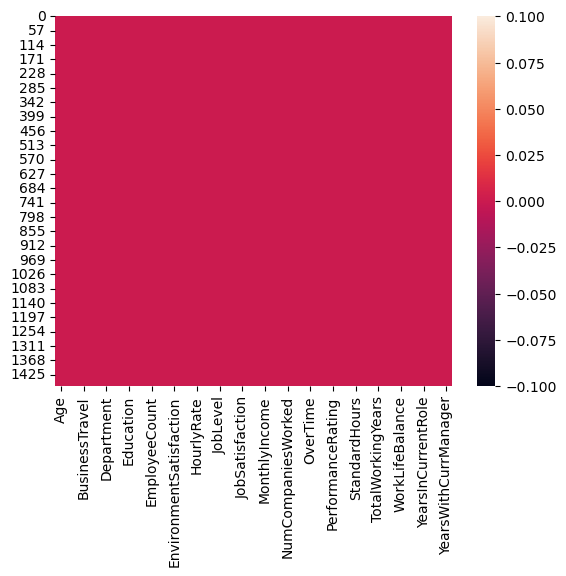

In [10]:
# lets visualize it using heatmap
sns.heatmap(df.isnull())

# Seperating Numerical andCategorical columns

In [11]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print('categorical_columns:',categorical_col)
print('\n')

# checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print('numerical_columns:',numerical_col)

categorical_columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


numerical_columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# checking the number of unique values in each column

In [12]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In the EmployeeNumber column all the values are unique, and maybe they are not playing import roll.so we can drop it

In [13]:
# Dropping EmployeeNumber column
df.drop(["EmployeeNumber",'EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [14]:
# checking count of each unique values in target column
# i am using value_counts() function so that i can fetch out the count value
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

 the count of NO is 1233 out of 1470. And "yes" it is 237. you can see the difference between these two

These are the two categories present in the target column namely "yes" and "No"

By looking at this we can say that, this is a Binary Classification problem

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

# Data visualization

No     1233
Yes     237
Name: Attrition, dtype: int64


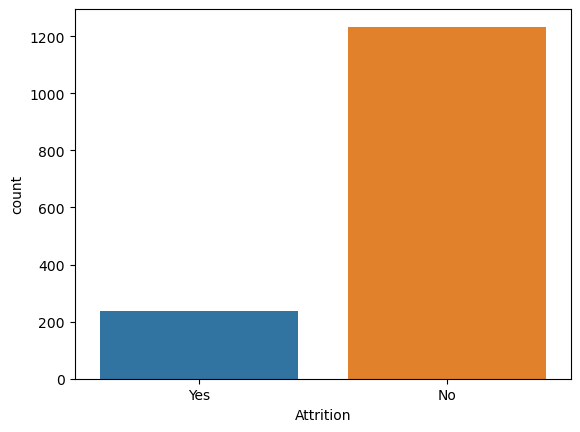

In [16]:
ax=sns.countplot(x='Attrition',data=df)
print(df['Attrition'].value_counts())

we can observe that the count of "No Attrition" are high compared to the count of"Yes Attrition".
This leads to class imbalance issue in the data

Male      882
Female    588
Name: Gender, dtype: int64


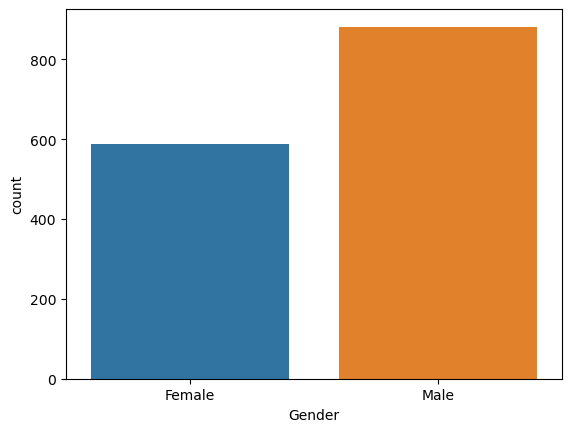

In [17]:
# visualizing the count of gender 
print(df['Gender'].value_counts())
ax=sns.countplot(x='Gender',data=df)
plt.show()

from the plot we can observe that the total number of male employees are more than female employees.

<AxesSubplot:ylabel='BusinessTravel'>

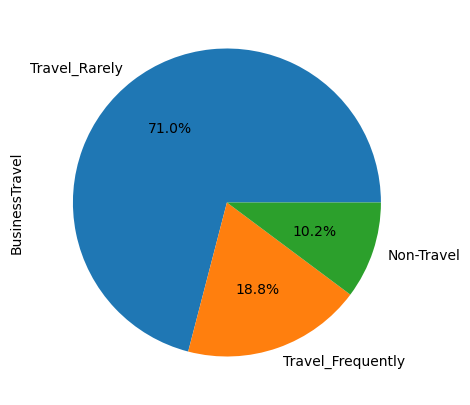

In [18]:
# visualizing the count of BusinessTravel 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%')

71% people doing business travels rarely,10.2% people not doing any business travels,18.8 people are doing business travel frequently 

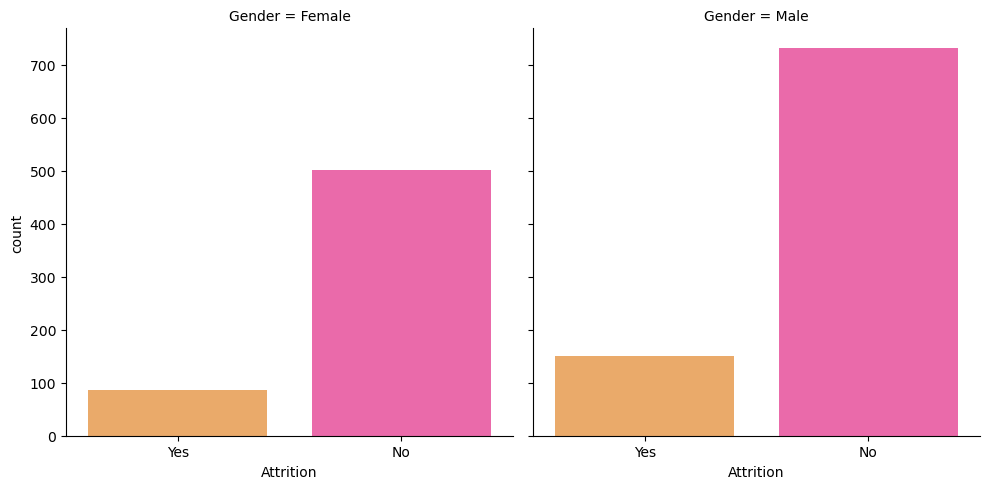

In [19]:
# comparing Gender and Attrition
sns.catplot(x="Attrition",col="Gender",data=df,kind="count",palette="spring_r")

in both genders employees doing attrition are less than no attrition

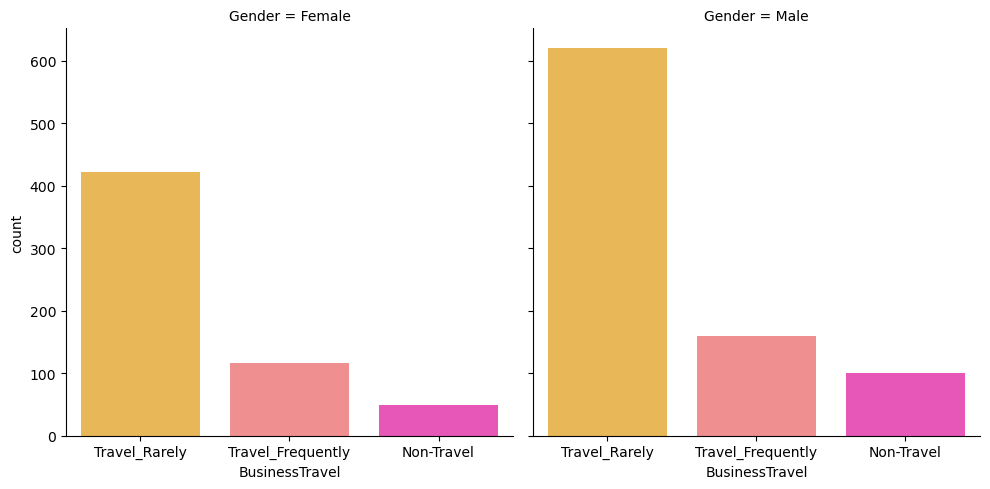

In [20]:
sns.catplot(x="BusinessTravel",col="Gender",data=df,kind="count",palette="spring_r")

on seeing graph we found in both genders rarely traveler are more than frequently travelers

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


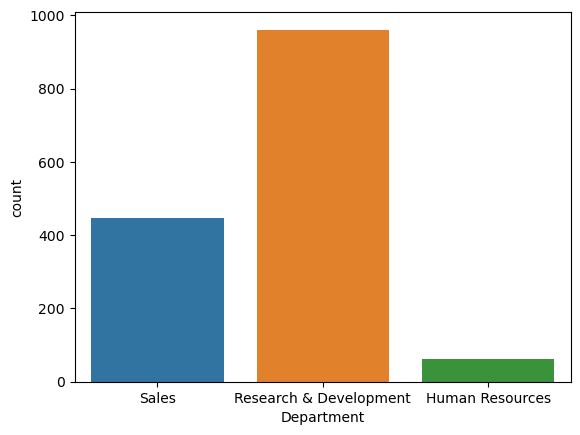

In [21]:

print(df['Department'].value_counts())
ax=sns.countplot(x='Department',data=df)
plt.show()

more people working on research and development

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


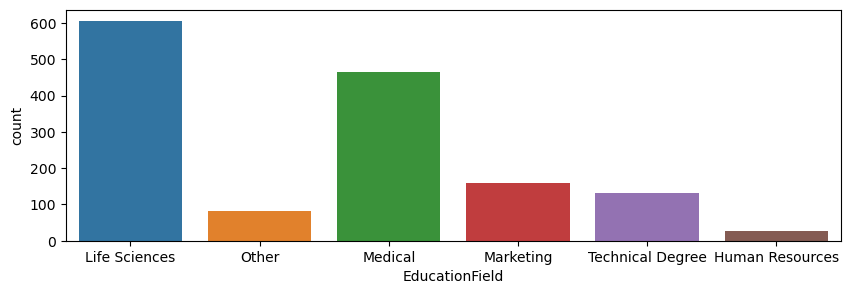

In [22]:
 
plt.figure(figsize=(10,3))
print(df['EducationField'].value_counts())
ax=sns.countplot(x='EducationField',data=df)
plt.show()

maximum number of employees are from Life science and medical educationfield

# Checking for skewness

In [23]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [24]:
import numpy as np

for i in df.columns:
    if df[i].dtypes!="object":
        if df[i].skew()<0.5 and df[i].skew()> -0.5:
            continue
        elif df[i].skew() > 0.5 or df[i].skew() < -0.5:
            df[i] = np.sqrt(df[i])
            

In [25]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.398114
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.593923
JobSatisfaction            -0.329672
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.057528
TotalWorkingYears           0.176358
TrainingTimesLastYear      -1.216268
WorkLifeBalance            -1.033670
YearsAtCompany              0.426835
YearsInCurrentRole         -0.254344
YearsSinceLastPromotion     0.739126
YearsWithCurrManager       -0.254611
dtype: float64

# Encoding categorical columns

In [26]:
# here i am using Ordinal Encoder for encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df        

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1.000000,2,1.0,2,0.0,...,1.732051,1,0.0,2.828427,0.000000,1.000000,2.449490,2.000000,0.000000,2.236068
1,49,0.0,1.0,279,1.0,2.828427,1,1.0,3,1.0,...,2.000000,4,1.0,3.162278,1.732051,1.732051,3.162278,2.645751,1.000000,2.645751
2,37,1.0,2.0,1373,1.0,1.414214,2,4.0,4,1.0,...,1.732051,2,0.0,2.645751,1.732051,1.732051,0.000000,0.000000,0.000000,0.000000
3,33,0.0,1.0,1392,1.0,1.732051,4,1.0,4,0.0,...,1.732051,3,0.0,2.828427,1.732051,1.732051,2.828427,2.645751,1.732051,0.000000
4,27,0.0,2.0,591,1.0,1.414214,1,3.0,1,1.0,...,1.732051,4,1.0,2.449490,1.732051,1.732051,1.414214,1.414214,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,4.795832,2,3.0,3,1.0,...,1.732051,3,1.0,4.123106,1.732051,1.732051,2.236068,1.414214,0.000000,1.732051
1466,39,0.0,2.0,613,1.0,2.449490,1,3.0,4,1.0,...,1.732051,1,1.0,3.000000,2.236068,1.732051,2.645751,2.645751,1.000000,2.645751
1467,27,0.0,2.0,155,1.0,2.000000,3,1.0,2,1.0,...,2.000000,2,1.0,2.449490,0.000000,1.732051,2.449490,1.414214,0.000000,1.732051
1468,49,0.0,1.0,1023,2.0,1.414214,3,3.0,4,1.0,...,1.732051,4,0.0,4.123106,1.732051,1.414214,3.000000,2.449490,0.000000,2.828427


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   float64
 13  JobRole                   1470 non-null   float64
 14  JobSatis

we have converted, the categorical columns into numerical columns using OrdinalEncoding method

In [28]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,2.725944,2.912925,2.247619,2.721769,0.600000,...,1.773246,2.712245,0.657599,3.151925,1.609742,1.645722,2.404559,1.776218,1.040282,1.739477
std,9.135373,0.367863,0.665455,403.509100,0.527792,1.327760,1.024165,1.331369,1.093082,0.490065,...,0.096682,1.081209,0.601405,1.160118,0.456281,0.229914,1.107742,1.036837,1.051818,1.047900
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.732051,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,1.414214,2.000000,1.000000,2.000000,0.000000,...,1.732051,2.000000,0.000000,2.449490,1.414214,1.414214,1.732051,1.414214,0.000000,1.414214
50%,36.000000,0.000000,2.000000,802.000000,1.000000,2.645751,3.000000,2.000000,3.000000,1.000000,...,1.732051,3.000000,1.000000,3.162278,1.732051,1.732051,2.236068,1.732051,1.000000,1.732051
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,3.741657,4.000000,3.000000,4.000000,1.000000,...,1.732051,4.000000,1.000000,3.872983,1.732051,1.732051,3.000000,2.645751,1.732051,2.645751
max,60.000000,1.000000,2.000000,1499.000000,2.000000,5.385165,5.000000,5.000000,4.000000,1.000000,...,2.000000,4.000000,1.732051,6.324555,2.449490,2.000000,6.324555,4.242641,3.872983,4.123106


# correlation between target variable and independent variables.

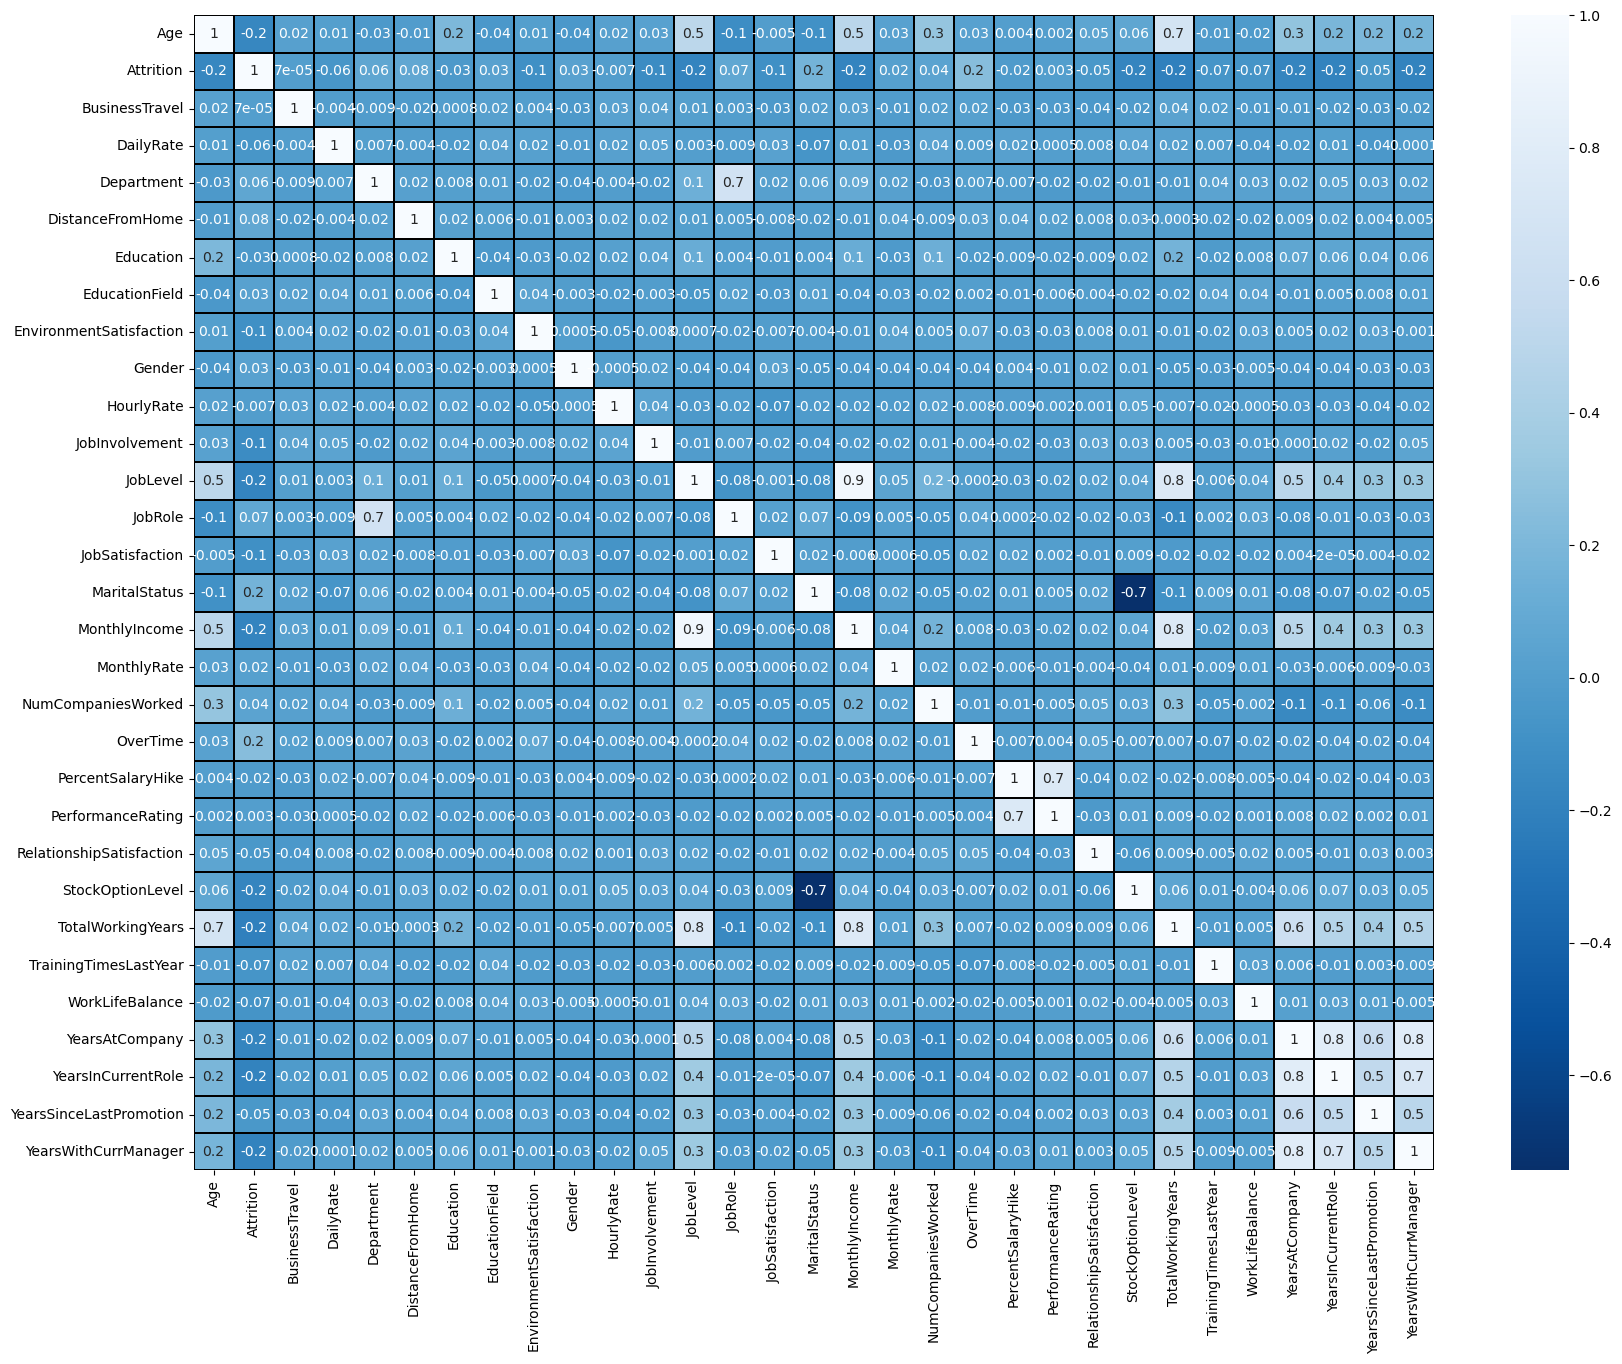

In [29]:
# visualizing the correlation by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor='black',annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

# visualizing the correlation between label and features using bar plot

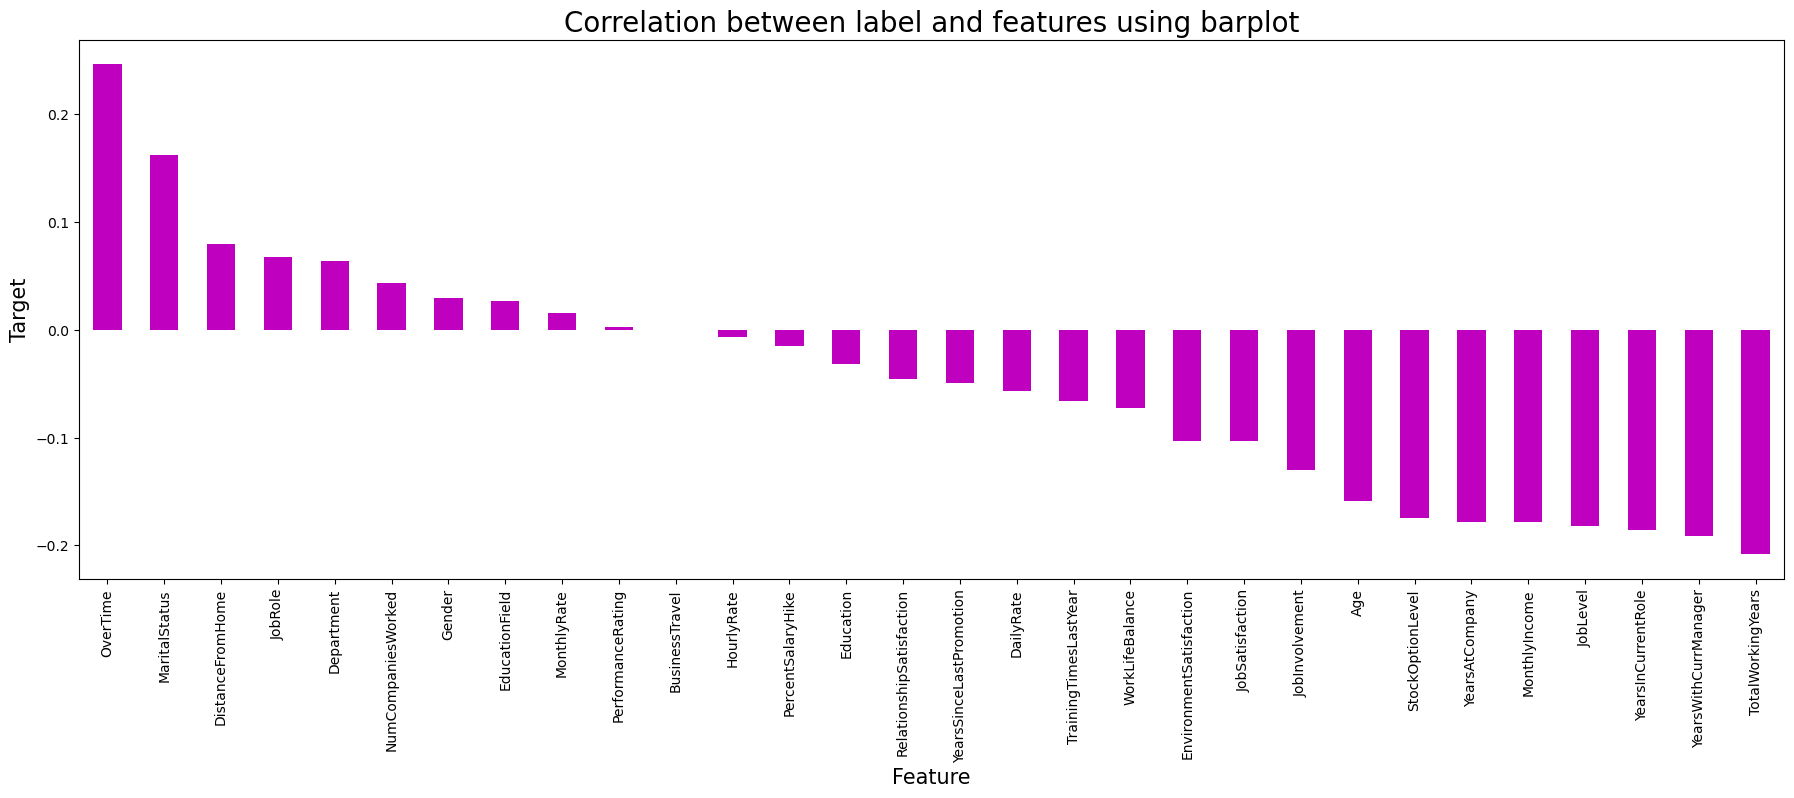

In [30]:
plt.figure(figsize=(22,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

from the above bar plot we can notice the positive and negative correlation between the features and the target.Here the features monthly rate,performance rating,businesstravel,hourlyrate,percentsalaryhike,have very less correlation with the column.

# seperating features and label

In [31]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

# Feature Scaling using Standard Scalarization

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.300333,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-1.09381,-0.278944,-3.529164,-2.809485,0.040574,0.215904,-0.989370,0.474052
1,1.322365,-0.913194,-1.297775,-0.493817,0.077211,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.56953,0.008926,0.268147,0.375612,0.684253,0.838925,-0.038311,0.865142
2,0.008343,0.590048,1.414363,-0.493817,-0.988263,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-1.09381,-0.436461,0.268147,0.375612,-2.171423,-1.713695,-0.989370,-1.660530
3,-0.429664,-0.913194,1.461466,-0.493817,-0.748803,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-1.09381,-0.278944,0.268147,0.375612,0.382771,0.838925,0.657912,-1.660530
4,-1.086676,0.590048,-0.524295,-0.493817,-0.988263,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.56953,-0.605693,0.268147,0.375612,-0.894326,-0.349262,0.355631,-0.310501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.559462,-0.891688,0.565311,0.254625,0.816497,-1.224807,...,-0.426230,0.266233,0.56953,0.837424,0.268147,0.375612,-0.152155,-0.349262,-0.989370,-0.007089
1466,0.227347,0.590048,-0.469754,-0.493817,-0.208282,-1.868426,0.565311,1.169781,0.816497,-1.175601,...,-0.426230,-1.584178,0.56953,-0.131001,1.373144,0.375612,0.217807,0.838925,-0.038311,0.865142
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.546929,0.085049,-0.937414,-0.660531,0.816497,1.038693,...,2.346151,-0.658973,0.56953,-0.605693,-3.529164,0.375612,0.040574,-0.349262,-0.989370,-0.007089
1468,1.322365,-0.913194,0.546677,1.401512,-0.988263,0.085049,0.565311,1.169781,0.816497,-0.142264,...,-0.426230,1.191438,-1.09381,0.837424,0.268147,-1.007274,0.537709,0.649572,-0.989370,1.039527


We have Scaled the data using standard Scalarization method to overcome the issue of biasness

# Checking variance inflation factor


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,2.071763,Age
1,1.017966,BusinessTravel
2,1.023560,DailyRate
3,1.961355,Department
4,1.015172,DistanceFromHome
5,1.063302,Education
6,1.017016,EducationField
7,1.020342,EnvironmentSatisfaction
8,1.020174,Gender
9,1.022303,HourlyRate


there is no multicollinearity found

In [34]:
y.value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

here we can see the data is not balanced,since it is a classification problem we will balance the data using oversampling method

# Oversampling

In [35]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y =SM.fit_resample(x,y)

In [36]:
# Checking value count of target column
y.value_counts()

1.0    1233
0.0    1233
Name: Attrition, dtype: int64

after applying the SMOTE method now you can see, when i am checking the value count function, the values the count of both the classes are same

# finding the best random state

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0         
maxRS=0           
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Best accuracy is",maxAccu,"at random_state",maxRS)        

 Best accuracy is 0.9581081081081081 at random_state 39


# creating train test split

In [38]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# classification Algorithms

In [39]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [40]:
# checking accuracy for RandomForestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.9513513513513514
[[371  16]
 [ 20 333]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       387
         1.0       0.95      0.94      0.95       353

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740



The accuracy for this model is 95%

In [41]:
# checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7891891891891892
[[308  79]
 [ 77 276]]
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       387
         1.0       0.78      0.78      0.78       353

    accuracy                           0.79       740
   macro avg       0.79      0.79      0.79       740
weighted avg       0.79      0.79      0.79       740



The accuracy for this model is 76%

In [42]:
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.927027027027027
[[348  39]
 [ 15 338]]
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       387
         1.0       0.90      0.96      0.93       353

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



The accuracy for this model is 91%

In [43]:
# checking accuracy for GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9337837837837838
[[368  19]
 [ 30 323]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       387
         1.0       0.94      0.92      0.93       353

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



The accuracy for this model is 94%

In [44]:
# checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9243243243243243
[[362  25]
 [ 31 322]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       387
         1.0       0.93      0.91      0.92       353

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



The accuracy for this model is 89%

In [45]:
# checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9108108108108108
[[360  27]
 [ 39 314]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       387
         1.0       0.92      0.89      0.90       353

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740



The accuracy for this model is 92%

In [46]:
# checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9608108108108108
[[369  18]
 [ 11 342]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       387
         1.0       0.95      0.97      0.96       353

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740



The accuracy for this model is 97%

# cross valdation score

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
# checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.79554656 0.97565923 0.96957404 0.98174442 0.97768763]
0.9400423746212152
Difference between Accuracy score and cross validation score is- 0.0113089767301362


In [49]:
# checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predLR)-score.mean())

[0.78947368 0.79716024 0.78701826 0.78498986 0.82555781]
0.7968399701078253
Difference between Accuracy score and cross validation score is- -0.007650780918636024


In [50]:
# checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predGB)-score.mean())

[0.5708502  0.96754564 0.95943205 0.96146045 0.96348884]
0.8845554360233553
Difference between Accuracy score and cross validation score is- 0.049228347760428504


In [51]:
# checking cv score for Support vector machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predsvc)-score.mean())

[0.91093117 0.93914807 0.92697769 0.9148073  0.92697769]
0.9237683849192336
Difference between Accuracy score and cross validation score is- 0.0032586421077933636


In [52]:
# checking cv score for Adaboost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predABC)-score.mean())

[0.61133603 0.93914807 0.92292089 0.9127789  0.94929006]
0.8670947926846294
Difference between Accuracy score and cross validation score is- 0.05722953163969491


In [53]:
# checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predBC)-score.mean())

[0.72874494 0.94929006 0.92292089 0.94320487 0.94929006]
0.8986901643248391
Difference between Accuracy score and cross validation score is- 0.012120646485971776


In [54]:
# checking cv score for Support ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score.mean())

[0.93522267 0.97363083 0.97565923 0.97768763 0.98174442]
0.9687889563196492
Difference between Accuracy score and cross validation score is- -0.007978145508838463


 Bagging Classifier is our best model as the difference between accuracy score and cross validation score is least. 

# Hyper parameter tuning

In [55]:
# Bagging Classifier
from sklearn.model_selection import GridSearchCV

parameters = {
    
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'n_jobs': [-1, 1],
    'random_state': [10, 50, 1000]
}

In [56]:
GCV=GridSearchCV(BaggingClassifier(),parameters,cv=5)

In [57]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 200], 'n_jobs': [-1, 1],
                         'random_state': [10, 50, 1000]})

In [58]:
GCV.best_params_

{'bootstrap': True,
 'max_samples': 1.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 50}

In [59]:
Final_model=BaggingClassifier(bootstrap= True,max_samples= 0.7, n_estimators= 200,n_jobs= -1,random_state= 50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.24324324324324


after hyper parameter tuning accuracy increased

In [60]:
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve

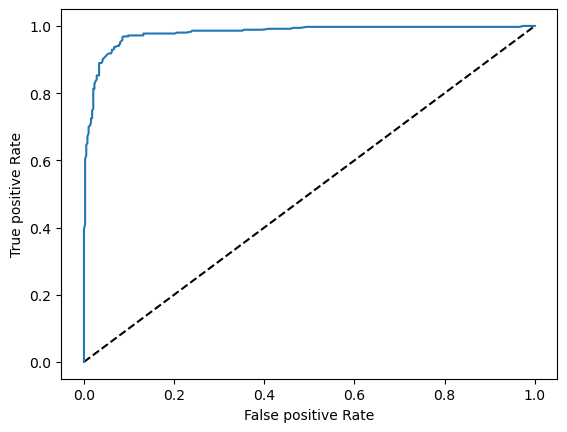

Auc Score: 
 0.9329116981795023


In [61]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier(area=%0.2f)'%roc_auc)
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print('Auc Score:','\n',auc_score)

# saving the model

In [62]:
import joblib
joblib.dump(Final_model,"HR Analytics Project.pkl")

['HR Analytics Project.pkl']

# predicting by using the saved model

In [63]:
# lets load the saved model and get the prediction
model=joblib.load('HR Analytics Project.pkl')

# predictions
prediction=model.predict(x_test)
prediction

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1.

# check how my model is behaving

In [64]:
# creating a dataframe
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,730,731,732,733,734,735,736,737,738,739
Predicted,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Original,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
